# Libraries

In [1]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading the Files

Download the csv files into the `data/` directory.

train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays wit

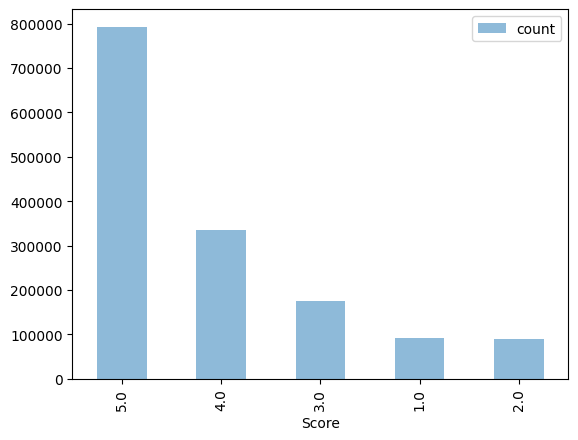


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [2]:
trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

In [3]:
print(trainingSet.shape)

(1697533, 9)


# Adding Features

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
import gc
import numpy as np

In [6]:
# need to run once
#nltk.download('stopwords')
#nltk.download('punkt_tab')
#nltk.download('wordnet')

In [7]:
import re

def add_features_to(df):
    # This is where you can do all your feature extraction

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    df['Year'] = pd.to_datetime(df['Time'], unit='s').dt.year


    # remove columns that I think aren't needed. file very large regardless
    #not_needed_features = ['ProductId', 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']
    #df.drop(not_needed_features, axis=1)

    # make sure text and summary is not empty.
    df['Text'] = df['Text'].fillna('').astype(str)
    df['Summary'] = df['Summary'].fillna('').astype(str)
    df['LenText'] = df['Text'].apply(len)
    df['LenSummary'] = df['Summary'].apply(len)

    '''
    cleanedText = []
    
    lemma = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    for text in df['Text']:

        # clean out non alphanumeric
        text = re.sub("[^a-zA-Z0-9]"," ",text)
        
        # tokenize for bag of words
        text = nltk.word_tokenize(text.lower())
        text = [lemma.lemmatize(word) for word in text]
        
        # Removing stopwords
        text = [word for word in text if word not in stop_words]
        
        # Joining
        text = " ".join(text)
        
        cleanedText.append(text)
    
    df['cleanedText'] = cleanedText
    
    cleanedSummary = []

    for text in df['Summary']:

        # clean out non alphanumeric
        text = re.sub("[^a-zA-Z0-9]"," ",text)
        
        # tokenize for bag of words
        text = nltk.word_tokenize(text.lower())
        text = [lemma.lemmatize(word) for word in text]
        
        # Removing stopwords
        text = [word for word in text if word not in stop_words]
        
        # Joining
        text = " ".join(text)
        
        cleanedSummary.append(text)
    
    df['cleanedSummary'] = cleanedSummary   
    df['cleaned'] = df['cleanedSummary'] + ' ' + df['cleanedText']
    '''
    df['allText'] = df['ProductId'] + ' ' + df['Summary'] + ' ' + df['Text']
    return df

# Load the feature extracted files if they've already been generated
if exists('./data/X_train.csv'):
    X_train = pd.read_csv("./data/X_train.csv")
if exists('./data/X_submission.csv'):
    X_submission = pd.read_csv("./data/X_submission.csv")

else:
    # Process the DataFrame
    train = add_features_to(trainingSet)

    # Merge on Id so that the submission set can have feature columns as well
    X_submission = pd.merge(train, testingSet, left_on='Id', right_on='Id')
    X_submission = X_submission.drop(columns=['Score_x'])
    X_submission = X_submission.rename(columns={'Score_y': 'Score'})

    # The training set is where the score is not null
    X_train =  train[train['Score'].notnull()]
    
    X_submission.to_csv("./data/X_submission.csv", index=False)
    X_train.to_csv("./data/X_train.csv", index=False)

In [8]:
#X_small = X_train.loc[(X_train['Helpfulness'] > 0.5) | (X_train['Score'] != 5.0)]
#print(X_small.shape)
#X_small['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
#plt.show()


In [9]:
#vectorizer = CountVectorizer(ngram_range=(1,1), max_features=500)
# values.astype('U') converts entire series and overloaded memory
#summary_words = vectorizer.fit_transform(X_train['cleanedSummary'].apply(lambda x: np.str_(x))).astype(np.uint8)
#print(summary_words.shape)

#vectorizer2 = CountVectorizer(max_features=10000)
#text_words = vectorizer.fit_transform(X_train['cleanedText'].apply(lambda x: np.str_(x))).astype(np.uint8)
#print(text_words.shape)

In [10]:

#tftran = TfidfVectorizer(ngram_range=(1,1), max_features=500)
#summary_words = tftran.fit_transform(X_train['cleanedSummary'].apply(lambda x: np.str_(x))).astype(np.uint8)
#print(summary_words.shape)
#text_words = tftran.fit_transform(X_train['cleanedText'].apply(lambda x: np.str_(x))).astype(np.uint8)
#print(text_words.shape)


In [9]:

scaler = StandardScaler()
X_train_extra = X_train[['Helpfulness', 'Year', 'LenText', 'LenSummary']]
X_train_extra_vectorized = scaler.fit_transform(X_train_extra)
X_sub_extra = X_submission[['Helpfulness', 'Year', 'LenText', 'LenSummary']]
X_sub_extra_vectorized = scaler.fit_transform(X_sub_extra)


# Feature Selection

In [12]:
#features = ['cleanedText']

#X_train_select = X_train[features]
#X_test_select = X_test[features]
#X_submission_select = X_submission[features]
#X_train['alltext'] = X_train['cleanedSummary'] + X_train['cleanedText']

# Sample + Split into training and testing set

In [10]:

#tfVect = TfidfVectorizer(ngram_range=(1,2), max_features=50000, binary=True)
#tfVect = TfidfVectorizer(max_features=5000, strip_accents="ascii", stop_words="english", ngram_range=(1,1), min_df=5)
tfVect = TfidfVectorizer(max_features=15000, stop_words="english", strip_accents="ascii", ngram_range=(1,2), min_df=5)

X_train_vectorized = tfVect.fit_transform(X_train['allText'].apply(lambda x: np.str_(x)))
X_sub_vectorized = tfVect.transform(X_submission['allText'].apply(lambda x: np.str_(x)))



In [11]:
from scipy.sparse import hstack, csr_matrix
#np.stack not quite working
#ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
X_train_all = hstack([X_train_vectorized, csr_matrix(X_train_extra_vectorized)])
X_sub_all = hstack([X_sub_vectorized, csr_matrix(X_sub_extra_vectorized)])

In [12]:
# Split training set into training and testing set
X_train_split, X_test_split, Y_train_split, Y_test_split = train_test_split(
    #X_train.drop(columns=['Score']),
    #np.concatenate((summary_words.toarray(), text_words.toarray()), axis=1),
    X_train_all,
    X_train['Score'],
    test_size=0.2,
    random_state=42
)
print(X_train_split.shape)
print(X_test_split.shape)
print(Y_train_split.shape)
print(Y_test_split.shape)

(1188272, 15004)
(297069, 15004)
(1188272,)
(297069,)


# Model Creation

In [13]:
# Learn the model
#model = KNeighborsClassifier(n_neighbors=3).fit(X_train_select, Y_train)
import time

start_time = time.time()

# LinearSVC produces values between 1 and 5 such as 1.5
# Using SVC only produces integers
#model = LinearSVC(dual="auto", random_state=42)
#model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
#model = MultinomialNB()

model.fit(X_train_split, Y_train_split)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

# Predict the score using the model
Y_test_predictions = model.predict(X_test_split)

Fitting SVC took 715.52 seconds


# Model Evaluation

Accuracy on testing set =  0.6591263309197527


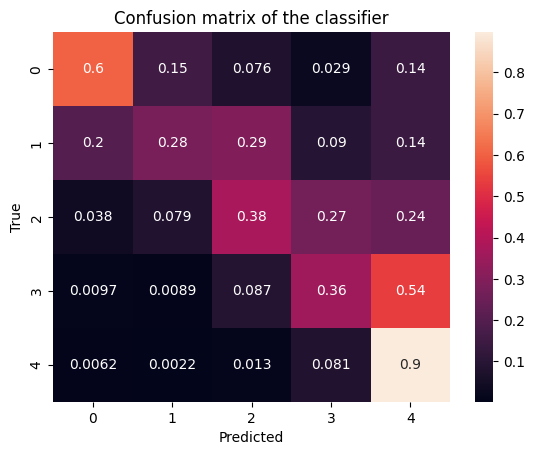

In [14]:
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test_split, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test_split, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [15]:
# Create the submission file
#X_sub_vectorized = tfVect.transform(X_submission['cleaned'].apply(lambda x: np.str_(x)))

X_submission['Score'] = model.predict(X_sub_all)
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)